# Training a gender classification model on Samrómur data

### Load data

In [1]:
import librosa
from ipywidgets import IntProgress
import pandas as pd
from sklearn.neural_network import MLPClassifier # multi-layer perceptron model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # to measure how good the model is
from sklearn import preprocessing

In [2]:
data = pd.read_csv("data/sample_samromur_21.05/metadata.tsv", sep="\t", dtype="string")

In [3]:
def extract_features(dataset, dir, mean=False):
    """
    Extracts MFCCs from the audio files in the dataset.
    Takes the mean of the MFCCs over time if mean=True (1D array), otherwise returns MFCCs for each frame (2D array).
    Returns a list of MFCCs and a list of labels.
    """
    X = []
    y = []
    progress = IntProgress(value=0, max=len(dataset), description="{} / {}".format(0, len(dataset)))
    display(progress)
    for index, row in dataset.iterrows():
        filepath = row["status"] + "/" + row["speaker_id"] + "/" + row["filename"]
        signal, sr = librosa.load(dir + "/" + filepath)
        mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
        #mfcc_deltas = librosa.feature.delta(mfccs) # delta features
        #mfcc_deltas2 = librosa.feature.delta(mfccs, order=2) # delta-delta features
        #X.append(np.concatenate((mfccs.mean(axis=1), mfcc_deltas.mean(axis=1), mfcc_deltas2.mean(axis=1)))) # averaging the features over the file and concatenating them
        X.append(mfccs.mean(axis=1)) # averaging the MFCCs over the file
        y.append(row["gender"])
        progress.value += 1
        progress.description = "{} / {}".format(progress.value, len(dataset))
    return X, y

In [4]:
# Extract features from the first 1000 training files and the first 100 test files
# This will take a while
samromur_dir = "data/sample_samromur_21.05"
X_train, y_train = extract_features(data[data["status"]=="train"].head(2000), samromur_dir, mean=True)
X_test, y_test = extract_features(data[data["status"]=="test"].head(100), samromur_dir, mean=True)

IntProgress(value=0, description='0 / 2000', max=2000)

IntProgress(value=0, description='0 / 100')

In [5]:
# MLPClassifier (Multi-layer Perceptron) is a simple feed-forward network
classifier = MLPClassifier(random_state=5) # random state just ensures that the training will produce the same model each time
classifier.fit(X_train, y_train) # train the model

MLPClassifier(random_state=5)

In [6]:
# Predict the gender of the test files
y_test_pred = classifier.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      female       0.59      0.77      0.67        26
        male       0.91      0.81      0.86        74

    accuracy                           0.80       100
   macro avg       0.75      0.79      0.76       100
weighted avg       0.83      0.80      0.81       100



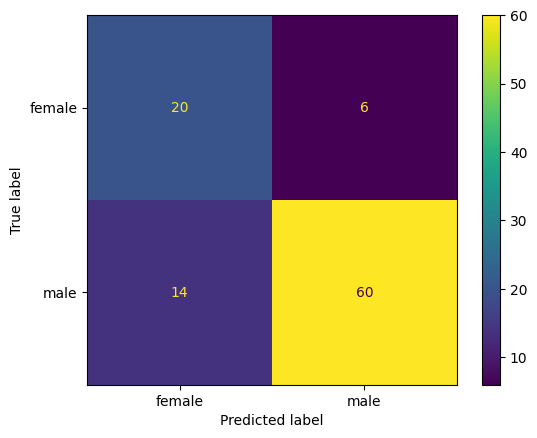

In [7]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
disp.plot()

A very important part of your project will be that you can correctly describe how your features are extracted and what information they contain. Please don't forget it.

### Ideas for your own project:

- Make another classifier using the Samrómur dataset (e.g. age, dialect, native language, or speaker identity)
    - Note for speaker identity you will probably need to download the full dataset to get many training samples for each speaker
- Make another classifier using a different dataset (e.g. emotion recognition, speaker recognition, language recognition)
- Make a music genre or instrument classifier using music files
- Try to improve the model by adding more features that you have learned about in the course
- Rather than averaging MFCCs across the file, train an RNN that takes the MFCCs for each frame as input